In [28]:
from cmath import nan


def otsu_thresholding(img,x):
    import matplotlib.pyplot
    import numpy

   # load histogram, Mathematische werte aus Histogramm rausgreifen
    n, bins = numpy.histogram(img.flatten(),bins = x)
  
   # initialize threshold value (T = 0) 
    thres = 0
    copy = img.copy()

    # create list to store values of within class variance for each threshold value
    bcv = list()
    
    # set up initial values
    for i in range(0,len(n)):
        bclv = 0
        w0_sum = 0
        mean_sum0 = 0
        mean_sum1 = 0
        w0 = 0
        w1 = 0
        w1_sum = 0

        #sum up the probabilites of each intensity value;  and the mean value (sind noch nicht happy mit der definition :()
        w0_sum = numpy.sum(numpy.array(n[0:i+1]))
        mean_sum0 = numpy.sum((numpy.array(bins[0:i+1])*numpy.array(n[0:i+1])))
            
        # background class probabilites and class mean levels
        w0 = w0_sum / sum(n)  
        if(sum(n[0:i+1]) != 0):  
             mean_0 = mean_sum0 / sum(n[0:i+1])
        else: mean_0 = 0
        
        # compute background class variance

        #v0_sum = numpy.sum((numpy.array((bins[0:i+1]-mean_0)** 2)*numpy.array(n[0:i+1])))
        #v0 = v0_sum / sum(n[0:i+1])
        
        # sum up the probabilites of each intensity value;  and the mean value
        w1_sum = numpy.sum(numpy.array(n[i+1:len(n)]))
        mean_sum1 = numpy.sum((numpy.array(bins[i+1:len(n)])*numpy.array(n[i+1:len(n)])))
            
        # compute foreground class probabilities and class mean levels    
        w1 = w1_sum / sum(n)
        if(sum(n[i+1:len(n)]) != 0):
            mean_1 = mean_sum1 / sum(n[i+1:len(n)])
        else: mean_1 = 0

        # compute foreground class variance 
        #v1_sum = numpy.sum((numpy.array((bins[i+1:len(n)]-mean_1)** 2)*numpy.array(n[i+1:len(n)])))
       
        #if( sum(n[i+1:len(n)]) != 0):
         #   v1 = v1_sum / sum(n[i+1:len(n)])
        #else: v1 = 0

        # compute within class variance and append to list
        bclv = w0*w1*((mean_1-mean_0)**2)
        bcv.append(bclv)

    # select optimal threshold value, minimum value of within class variance
    optimal_thres = max(bcv)

    #select optimal threshold in the list
    l = 0
    while l < len(bcv):
        if bcv[l] == optimal_thres: thres = bins[l]
        l += 1
   # index = numpy.where(numpy.array(wcv) == optimal_thres)
    #thres = bins[index]
    #perform image clipping 
    copy[copy < thres] = 0
    copy[copy >= thres] = 1

    return copy 


In [17]:
#Packages
%pylab
%matplotlib inline
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from nuclei_segmentation import otsu as ot
from nuclei_segmentation import dicescore as dsc
import os

Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


d:\Anaconda\envs\dataanalysis0104_env\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['f', 'nan']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [3]:
from PIL import Image
import os, os.path

imgs = []
path = r"data\Otsu_data\NIH3T3\img"
for f in os.listdir(path):
    imgs.append(imread(os.path.join(path,f)))

imgs_gt = []
path = r"data\Otsu_data\NIH3T3\gt"
for f in os.listdir(path):
    imgs_gt.append(imread(os.path.join(path,f)))

imgs_1 = []
path = r"data\Otsu_data\N2DH-GOWT1\img"
for f in os.listdir(path):
    imgs_1.append(imread(os.path.join(path,f)))

imgs_gt_1 = []
path = r"data\Otsu_data\N2DH-GOWT1\gt"
for f in os.listdir(path):
    imgs_gt_1.append(imread(os.path.join(path,f)))

imgs_2 = []
path = r"data\Otsu_data\N2DL-HeLa\img"
for f in os.listdir(path):
    imgs_2.append(imread(os.path.join(path,f)))

imgs_gt_2 = []
path = r"data\Otsu_data\N2DL-HeLa\gt"
for f in os.listdir(path):
    imgs_gt_2.append(imread(os.path.join(path,f)))


In [43]:
otsu_1 = []
for i in range(0,len(imgs)):
    otsu_1.append(otsu_thresholding(imgs[i],256)) 

otsu_2 = []
for i in range(0,len(imgs_1)):
    otsu_2.append(otsu_thresholding(imgs_1[i],220)) 

otsu_3 = []
for i in range(0,len(imgs_2)):
    otsu_3.append(otsu_thresholding(imgs_2[i],256)) 


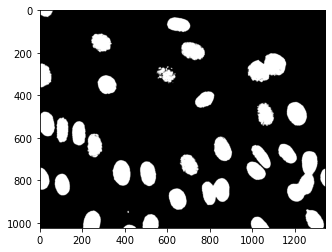

In [30]:
figure()
imshow(otsu_1[0], 'gray')

In [31]:

dice_sc = []
for j in range(0,len(otsu_1)):
        dice_sc.append(dsc.dice(otsu_1[j],imgs_gt[j]))
print(dice_sc)

[0.8943783223933183, 0.8845252721173281, 0.8248360803970239, 0.7345417270163801, 0.7304073649082119, 0.6728102311790894, 0.6711519137663287, 0.7237186625334818, 0.03844935467277361, 0.482970126366923, 0.0, 0.680536637820677, 0.00026339009389856846, 0.5757554586315079, 0.6165448260228947, 0.07605520913993832, 0.07186834004262373, 0.7965485556767932]


In [41]:
otsu_1_w = []
for i in range(0,len(imgs)):
    otsu_1_w.append(ot.otsu_thresholding(imgs[i],256)) 

otsu_2_w = []
for i in range(0,len(imgs_1)):
    otsu_2_w.append(ot.otsu_thresholding(imgs_1[i],220)) 

otsu_3_w = []
for i in range(0,len(imgs_2)):
    otsu_3_w.append(ot.otsu_thresholding(imgs_2[i],256)) 


In [23]:
dice_sc_w = []
for j in range(0,len(otsu_1_w)):
        dice_sc_w.append(dsc.dice(otsu_1_w[j],imgs_gt[j]))
print(dice_sc_w)

[0.8943783223933183, 0.8845252721173281, 0.8248360803970239, 0.7345417270163801, 0.7304073649082119, 0.6728102311790894, 0.6711519137663287, 0.7237186625334818, 0.03844935467277361, 0.482970126366923, 0.0, 0.680536637820677, 0.00026339009389856846, 0.5757554586315079, 0.6165448260228947, 0.07605520913993832, 0.07186834004262373, 0.7965485556767932]
